Extract and Analyze Voice Metrics

In [6]:
import librosa
import numpy as np

def analyze_voice(audio_path):
    y, sr = librosa.load(audio_path)
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    volume = librosa.feature.rms(y=y)
    
    # Calculate mean pitch and volume for each frame
    pitch_means = [np.mean(pitches[:, i][pitches[:, i] > 0]) for i in range(pitches.shape[1])]
    volume_means = volume[0]
    
    
    return pitch_means, volume_means

audio_path = '/home/koyilada-keerti/Downloads/audio_output/2008-laura-trice-005-5000k_audio.wav'  # Example path
pitch_means, volume_means = analyze_voice(audio_path)


/home/koyilada-keerti/my_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


Extract and Analyze Posture Data

In [7]:
import cv2
import mediapipe as mp

def analyze_posture(video_path):
    cap = cv2.VideoCapture(video_path)
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()
    
    head_turns = []
    mid_shoulder_points = []
    gestures = []  # Placeholder for gesture analysis
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Process the frame and get the pose
        results = pose.process(frame_rgb)
        
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            
            # Head turn (using nose position)
            nose_x = landmarks[mp_pose.PoseLandmark.NOSE].x
            nose_y = landmarks[mp_pose.PoseLandmark.NOSE].y
            head_turns.append((nose_x, nose_y))
            
            # Mid-shoulder point (midpoint between left and right shoulders)
            left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
            right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
            mid_shoulder_x = (left_shoulder.x + right_shoulder.x) / 2
            mid_shoulder_y = (left_shoulder.y + right_shoulder.y) / 2
            mid_shoulder_points.append((mid_shoulder_x, mid_shoulder_y))
            
            # Gesture analysis (Placeholder)
            # Add your own gesture analysis logic here
            
    cap.release()
    return head_turns, mid_shoulder_points, gestures

video_path = '/home/koyilada-keerti/Downloads/2008-laura-trice-005-5000k.mp4'  # Example path
head_turns, mid_shoulder_points, gestures = analyze_posture(video_path)


I0000 00:00:1719237034.806170    3678 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1719237034.842164   20235 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.5-1ubuntu1), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1719237035.012568   20228 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719237035.056786   20227 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Combine Data and Compute Correlation Matrix

In [8]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming length of all data is the same
length = min(len(pitch_means), len(volume_means), len(head_turns), len(mid_shoulder_points))
pitch_means = pitch_means[:length]
volume_means = volume_means[:length]
head_turns = head_turns[:length]
mid_shoulder_points = mid_shoulder_points[:length]

# Create a DataFrame for correlation analysis
data = {
    'Pitch': pitch_means,
    'Volume': volume_means,
    'Head_Turn_X': [ht[0] for ht in head_turns],
    'Head_Turn_Y': [ht[1] for ht in head_turns],
    'Mid_Shoulder_X': [ms[0] for ms in mid_shoulder_points],
    'Mid_Shoulder_Y': [ms[1] for ms in mid_shoulder_points]
    # Add gestures data if available
}
df = pd.DataFrame(data)

# Compute correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


                   Pitch    Volume  Head_Turn_X  Head_Turn_Y  Mid_Shoulder_X  \
Pitch           1.000000 -0.260845     0.058565     0.028619        0.057085   
Volume         -0.260845  1.000000     0.073450    -0.036082        0.062905   
Head_Turn_X     0.058565  0.073450     1.000000     0.043800        0.920966   
Head_Turn_Y     0.028619 -0.036082     0.043800     1.000000        0.170957   
Mid_Shoulder_X  0.057085  0.062905     0.920966     0.170957        1.000000   
Mid_Shoulder_Y  0.076946 -0.005365     0.586901     0.487416        0.699808   

                Mid_Shoulder_Y  
Pitch                 0.076946  
Volume               -0.005365  
Head_Turn_X           0.586901  
Head_Turn_Y           0.487416  
Mid_Shoulder_X        0.699808  
Mid_Shoulder_Y        1.000000  


Generating Heatmap

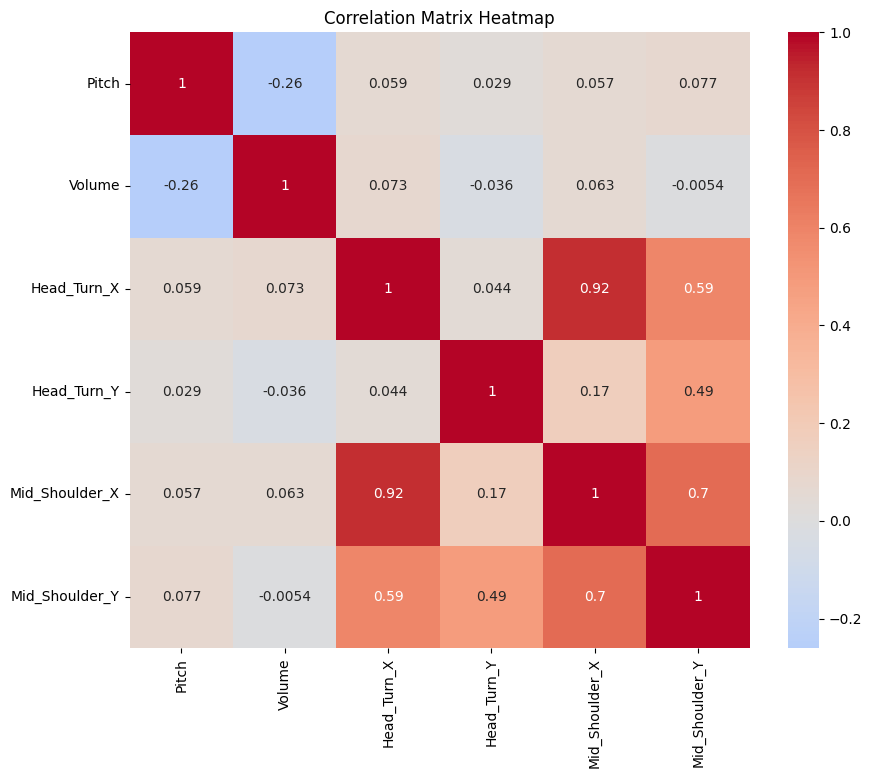

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()
